### Data Fields
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +  Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

In [120]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/bike-sharing-demand/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/bike-sharing-demand/test.csv')

In [121]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [122]:
df_test.columns #->prediction -> submission에 입력하고 -> kaggle에 업로드하면 채점
#casual, registered, count

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [123]:
df_train.shape,df_test.shape

((10886, 12), (6493, 9))

In [124]:
df_train.describe() #연속형변수->기술통계량

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [125]:
df_train.info() #자료형-> 수치형->머신러닝에 변환이 필요해 보이는지?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [126]:
df_train['datetime'] # 조작-> Feature engineerings ->전처리 -> 모델의 성능이 달라짐.

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00
...,...
10881,2012-12-19 19:00:00
10882,2012-12-19 20:00:00
10883,2012-12-19 21:00:00
10884,2012-12-19 22:00:00


In [127]:
import calendar #일주간격과 달
from datetime import datetime
df_train["date"] = df_train.datetime.apply(lambda x : x.split()[0])
df_train["hour"] = df_train.datetime.apply(lambda x : x.split()[1].split(":")[0])
df_train["weekday"] = df_train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df_train["month"] = df_train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
df_train["season"] = df_train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df_train["weather"] = df_train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

카테고리 유형으로 강제 변환

In [128]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    df_train[var] = df_train[var].astype("category")
#이론적으로 바꾸는 것은 의미가 없다.
#object은 문자열을 각 행마다 별도로 저장하고,
#category로 저장하면 고유값으로 한번 저장하고, 각 행을 정수 인덱스로 접근
#호출의 속도측면에서 사용하였음.

In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  date        10886 non-null  object  
 13  hour        10886 non-null  category
 14  weekday     10886 non-null  category
 15  month       10886 non-null  category
dtypes: category(7), float64(3), int64(4), object(2)
memory usage: 842.1+ KB


In [129]:
# df_train = df_train.drop(['datetime'],axis=1,inplace = False)

<Axes: >

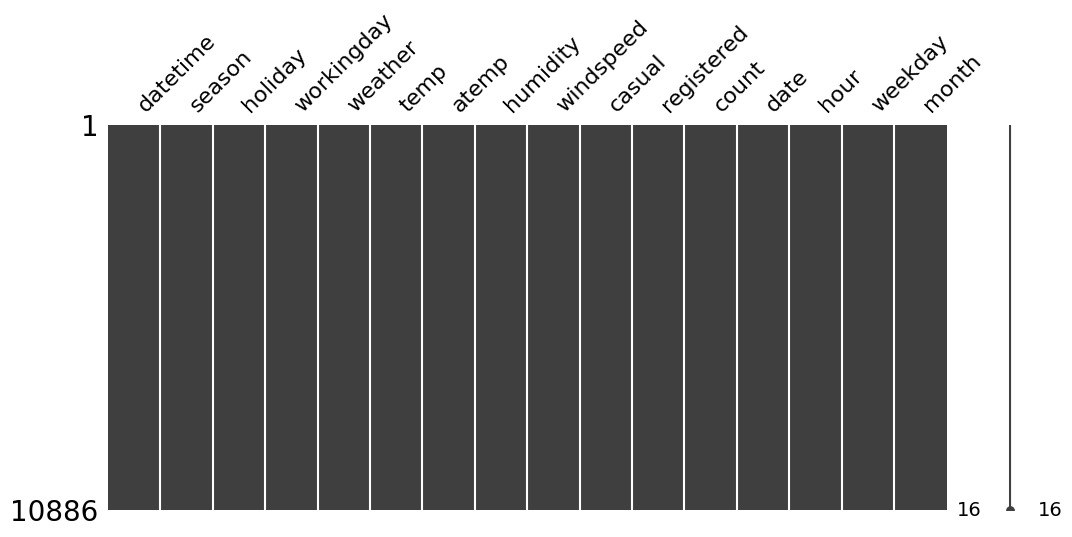

In [130]:
import missingno as msno
msno.matrix(df_train,figsize=(12,5))

- 원본 훼손을 방지

In [131]:
df_train_1 = df_train.copy()
df_test_1 = df_test.copy()

df_train_1['datetime'] = pd.to_datetime(df_train_1['datetime'])
df_train_1.dtypes

,0
datetime,datetime64[ns]
season,category
holiday,category
workingday,category
weather,category
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [132]:
# df_train_1['year'] = df_train_1['datetime'].dt.year
# df_train_1['month'] = df_train_1['datetime'].dt.month
# df_train_1['day'] = df_train_1['datetime'].dt.day
# df_train_1['hour'] = df_train_1['datetime'].dt.hour
# df_train_1['minute'] = df_train_1['datetime'].dt.minute
# df_train_1['second'] = df_train_1['datetime'].dt.second
# #요일 데이터 -일요일은 6 (0이 월요일)
# df_train_1['dayofweek'] = df_train_1['datetime'].dt.dayofweek

ValueError: Could not interpret value `year` for `x`. An entry with this name does not appear in `data`.

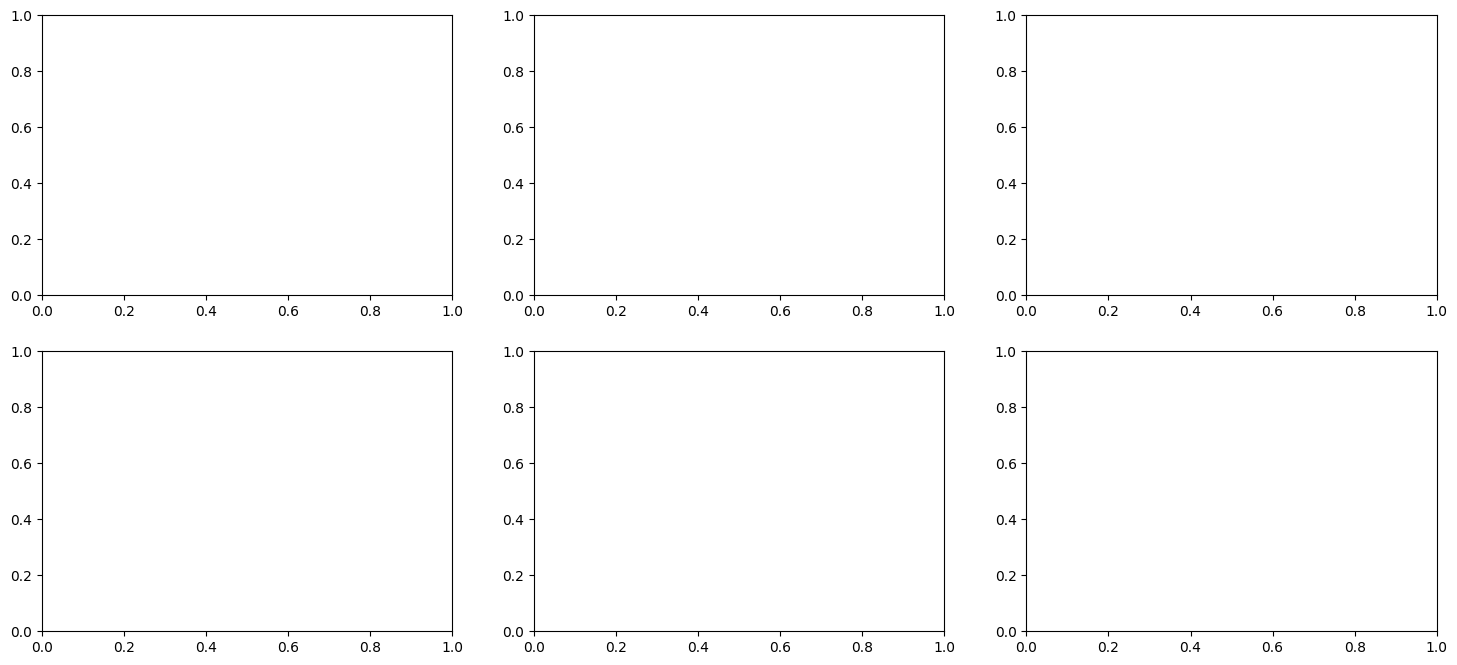

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=df_train_1,x="year", y="count",ax=ax1)
sns.barplot(data=df_train_1,x="month", y="count",ax=ax2)
sns.barplot(data=df_train_1,x="day", y="count",ax=ax3)
sns.barplot(data=df_train_1,x="hour", y="count",ax=ax4)
sns.barplot(data=df_train_1,x="minute", y="count",ax=ax5)
sns.barplot(data=df_train_1,x="second", y="count",ax=ax6)

ax1.set(ylabel='Count',title="Year rental amount")
ax2.set(ylabel='Count',title="Month rental amount")
ax3.set(ylabel='Count',title="day rental amount")
ax4.set(ylabel='Count',title="hour rental amount")

In [135]:
df_train_1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04,Saturday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,Wednesday,December
10882,2012-12-19 20:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20,Wednesday,December
10883,2012-12-19 21:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21,Wednesday,December
10884,2012-12-19 22:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22,Wednesday,December


[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Working or not Rental amount')]

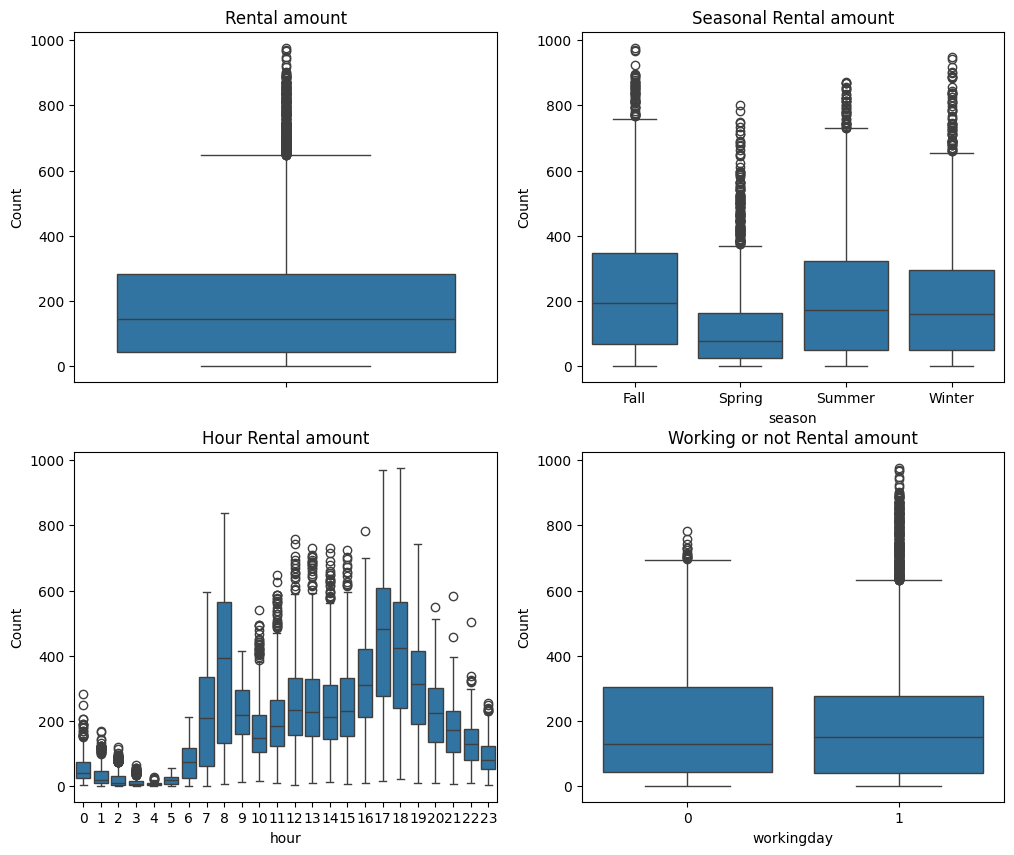

In [117]:
#boxplot(상자그림)-> 이상치 탐지
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=df_train_1, y="count", orient='v',ax=axes[0][0])
sns.boxplot(data=df_train_1, y="count", x='season',orient='v',ax=axes[0][1])
sns.boxplot(data=df_train_1, y="count", x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data=df_train_1, y="count", x='workingday',orient='v',ax=axes[1][1])

axes[0][0].set(ylabel='Count',title='Rental amount')
axes[0][1].set(ylabel='Count',title='Seasonal Rental amount')
axes[1][0].set(ylabel='Count',title='Hour Rental amount')
axes[1][1].set(ylabel='Count',title='Working or not Rental amount')
#이상치 처리를 해줘야 겠다.-> 이상치 방법론을 생각해봐야 함.-> 알고리즘을 불안정하게 만듦.

<Axes: xlabel='hour', ylabel='count'>

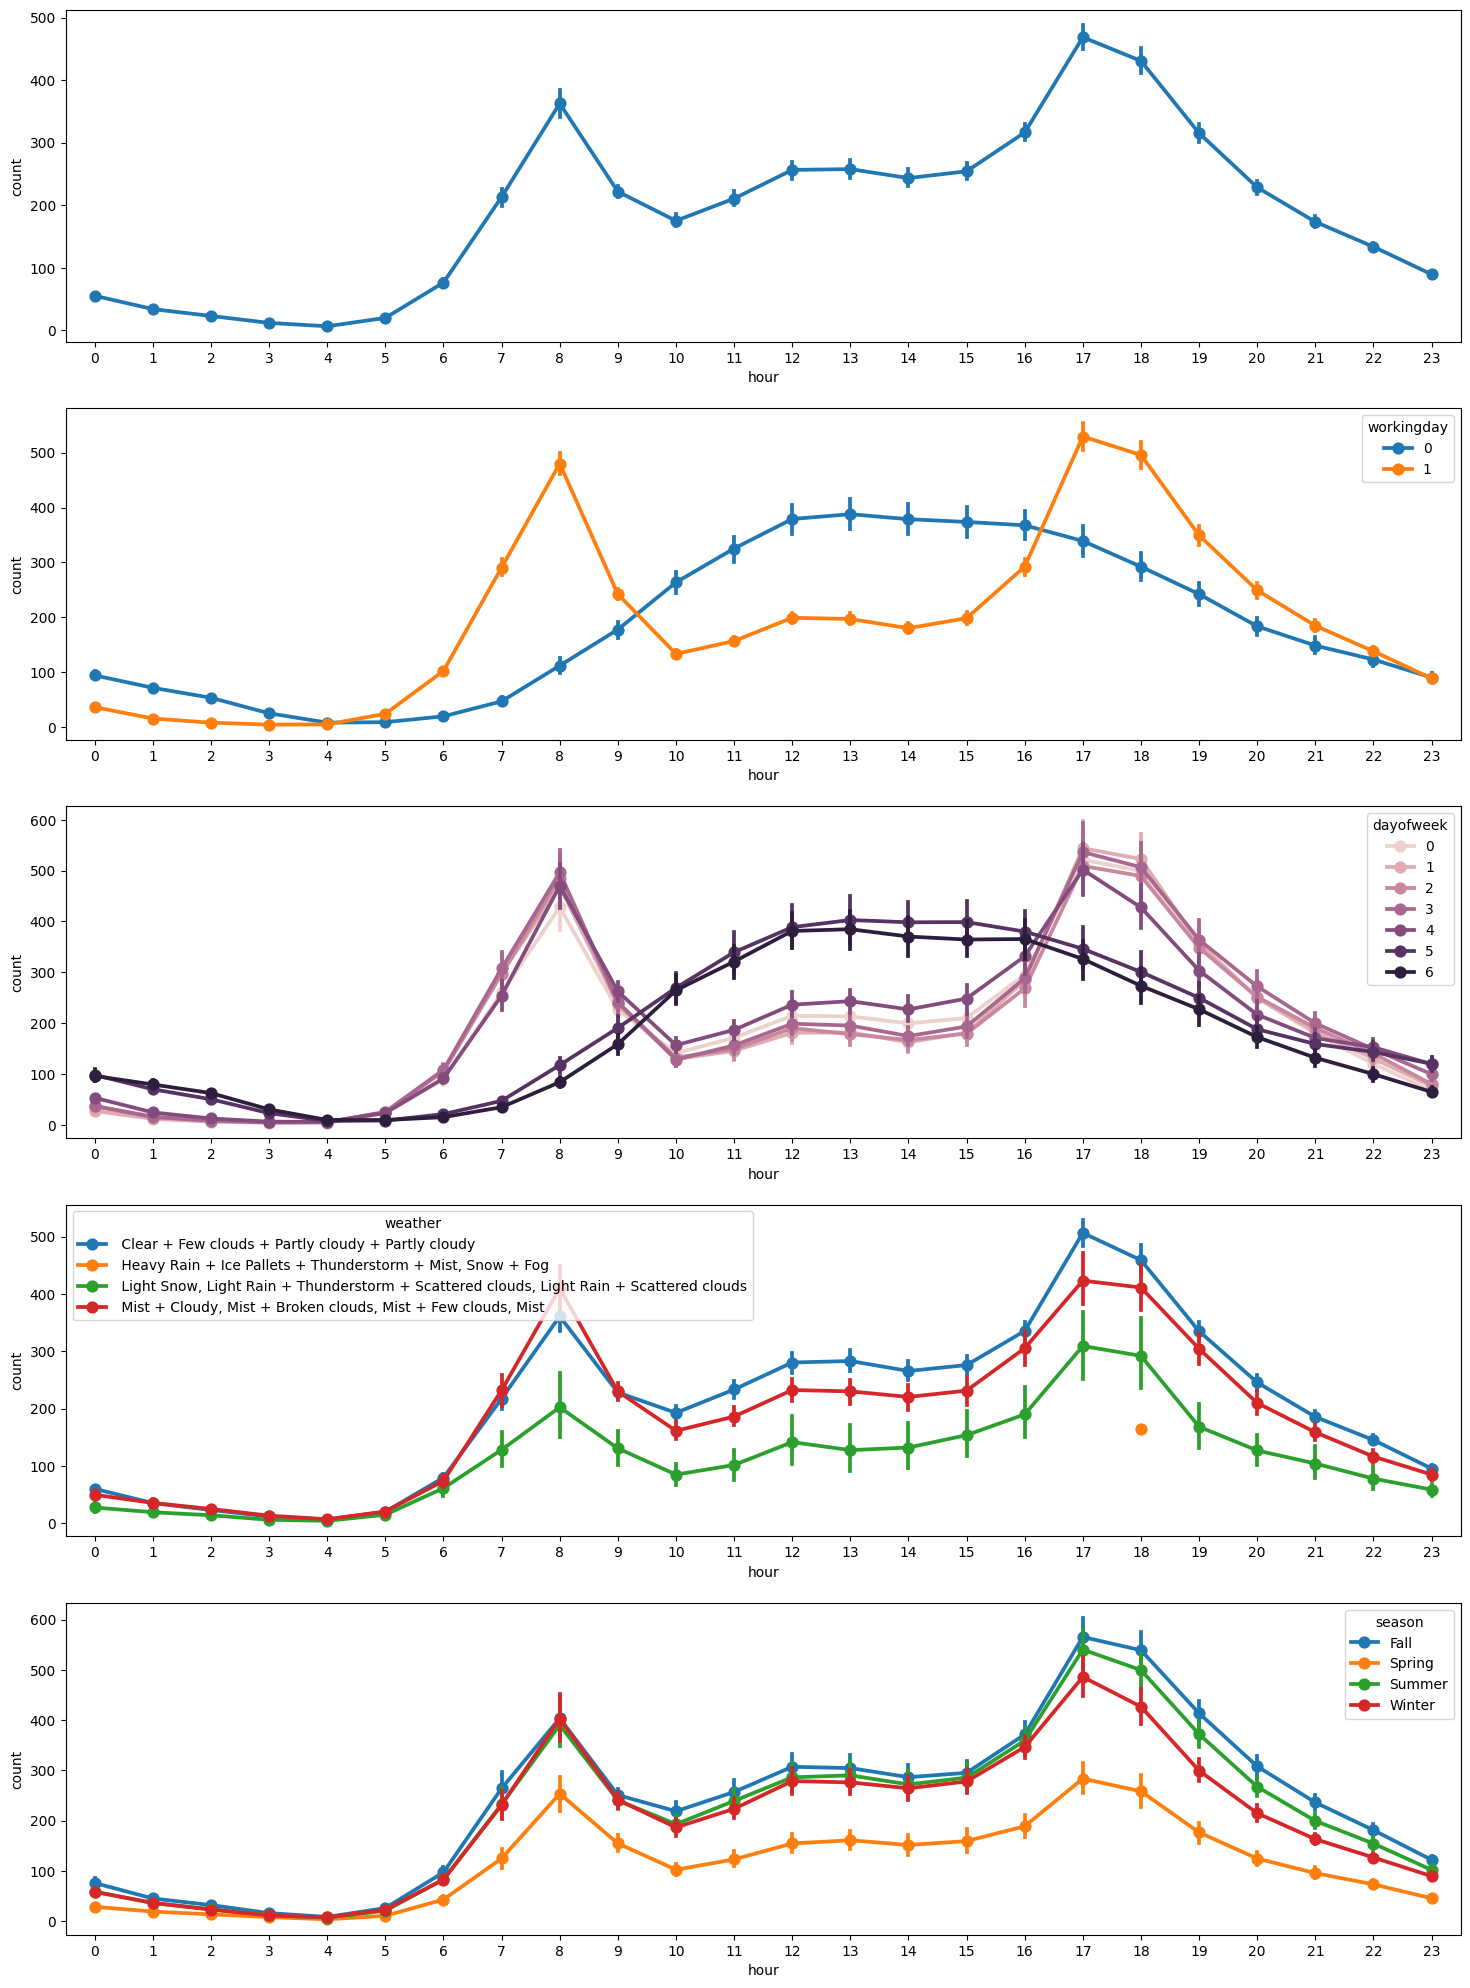

In [61]:
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)

#꺽은선 그래프.
sns.pointplot(data=df_train_1, x="hour",y="count",ax=ax1)

sns.pointplot(data=df_train_1, x="hour",y="count", hue="workingday",ax=ax2)

sns.pointplot(data=df_train_1, x="hour",y="count", hue="dayofweek",ax=ax3)

sns.pointplot(data=df_train_1, x="hour",y="count", hue="weather",ax=ax4)

sns.pointplot(data=df_train_1, x="hour",y="count", hue="season",ax=ax5)

#꺽은선을 그래프를 본 결과는 출퇴근시간에 많긴 많다!

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,date,hour,weekday,month,year,day,minute,second,dayofweek
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0000,3,...,16,2011-01-01,0,Saturday,1,2011,1,0,0,5
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,8,...,40,2011-01-01,1,Saturday,1,2011,1,0,0,5
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,5,...,32,2011-01-01,2,Saturday,1,2011,1,0,0,5
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,3,...,13,2011-01-01,3,Saturday,1,2011,1,0,0,5
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,0,...,1,2011-01-01,4,Saturday,1,2011,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,15.58,19.695,50,26.0027,7,...,336,2012-12-19,19,Wednesday,12,2012,19,0,0,2
10882,2012-12-19 20:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,14.76,17.425,57,15.0013,10,...,241,2012-12-19,20,Wednesday,12,2012,19,0,0,2
10883,2012-12-19 21:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,13.94,15.910,61,15.0013,4,...,168,2012-12-19,21,Wednesday,12,2012,19,0,0,2
10884,2012-12-19 22:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,13.94,17.425,61,6.0032,12,...,129,2012-12-19,22,Wednesday,12,2012,19,0,0,2


In [140]:
mask

array([[ 0.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.        ,  0.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26545787,
         0.09105166,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

<Axes: >

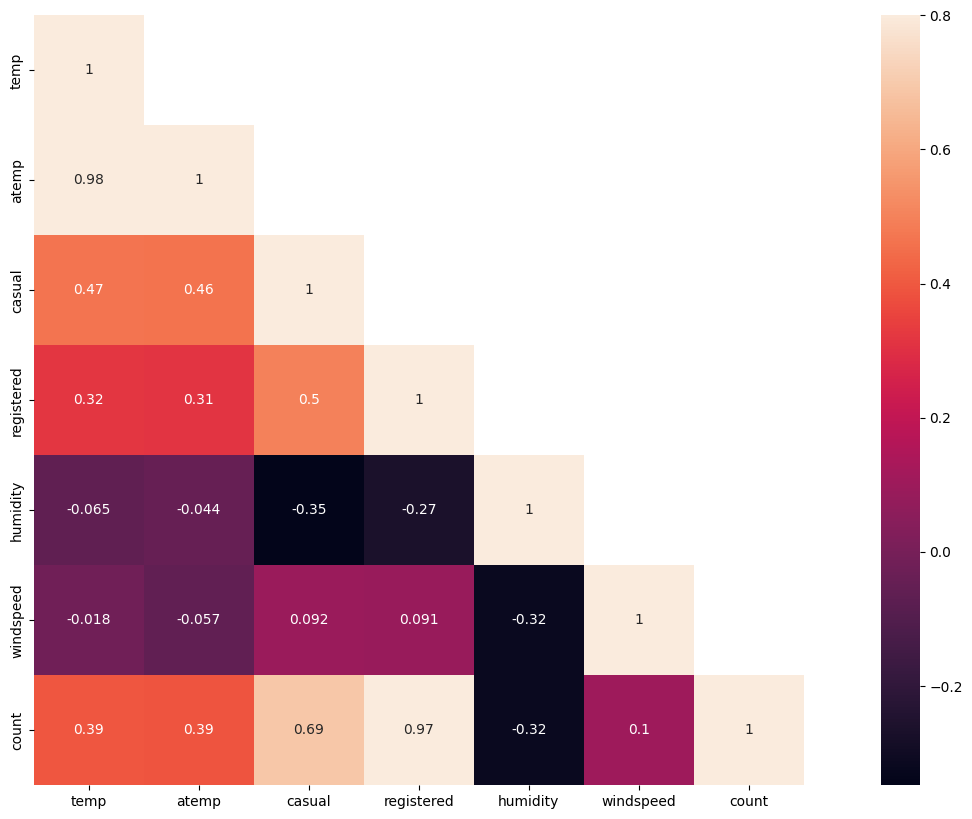

In [137]:
import numpy as np
#상관계수 측정
corrMatt =  df_train_1[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
# corrMatt = df_train_1.select_dtypes(include=['number']).corr()
mask =np.array(corrMatt)
#Return the indices for the upper-triangle of arr.
#상삼각행렬
mask[np.tril_indices_from(mask)]=False #상삼각행렬 False ->하삼각행렬
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8,square= True, annot=True)

<Axes: xlabel='humidity', ylabel='count'>

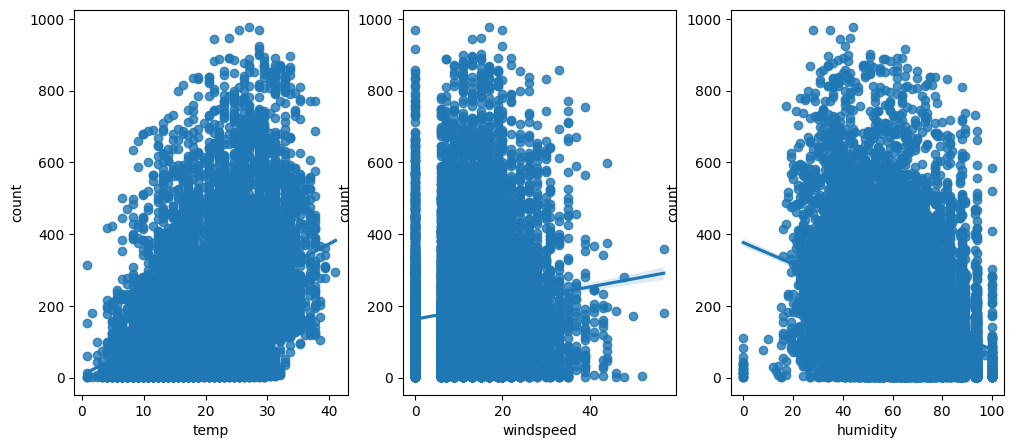

In [141]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x="temp",y="count",data=df_train_1, ax=ax1)
sns.regplot(x="windspeed",y="count",data=df_train_1, ax=ax2)
sns.regplot(x="humidity",y="count",data=df_train_1, ax=ax3)

##방법1) IQR(Interquartile Range)  = Q3(75%)-Q1(25%)

$Q1-1.5*IQR ~:~$ 최소 제한선


$Q3 + 1.5*IQR ~:~$   최대 제한선

In [ ]:
count_q1 = np.percentile(df_train_1['count'],25) #Q1

count_q3 = np.percentile(df_train_1['count'],75) #Q3

count_IQR = count_q3 - count_q1

#이상치를 제외한(이상치가 아닌 구간에 있는) 데이터만 조회
df_count_1_IQR = df_train_1[(df_train_1['count'] >= (count_q1 - (1.5*count_IQR))) &
                             (df_train_1['count'] <= (count_q3 + (1.5*count_IQR)))]
print(df_count_1_IQR) #300개 정도 날아가게 됨.

## 방법2) 3-sigma, 평균 $\pm$ 3* 표준편차차

In [ ]:
df_train_1_sigma = df_train_1[np.abs(df_train_1["count"] - df_train_1['count'].mean())<=(3*df_train_1["count"].std())]
#100개 정도 날아가게 됨.
#방법1과 방법2중에 무엇이 좋을까? -> 모델 평가를 해봐야 알 수 있음.

In [143]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/bike-sharing-demand/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/bike-sharing-demand/test.csv')

In [144]:
#train에 전처리를 진행(fit_transform)하셨다면, test에도 적용(transform)을 해야함.
data = pd.concat([df_train,df_test])
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

In [147]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
# apply+split-> 문자열(String)기준의 수동 파싱(parsing) ->속도는 빠름.
## -> 단순히 텍스트만 분리만 원하는 경우 (정확도를 낮추고)
# to_datetime -> 판다스의 날짜형(datetime64) 객체 반환
# -> 날짜로 변환해 시간 계산이 가능한 형태로 만드는 방법. -> 정확하지만 느림.

In [ ]:
# data['datetime'] = pd.to_datetime(data['datatime'])
# data['year'] = data['datetime'].dt.year
# data['month'] = data['datetime'].dt.month
# data['hour'] = data['datetime'].dt.hour
# data['weekday'] = data['datetime'].dt.weekday

In [148]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [149]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

- Spliting Train and Test Data

In [150]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=['datetime'])
datatimecol = dataTest['datetime']
ylabels = dataTrain['count']
ylabelsRegistered = dataTrain['registered']
ylabelsCasual = dataTrain['casual']

In [151]:
dataTrain = dataTrain.drop(dropFeatures,axis=1)
dataTest = dataTest.drop(dropFeatures,axis=1)

In [159]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

#np.nan_to_num : Replace NaN with zero and infinity with large finite numbers (default behaviour)
#or with the numbers defined by the user using the nan, posinf and/or neginf keywords.

In [160]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def rmsle(y,pred):
    log_y = np.log1p(y) #log(1+p) ->log1이 되는 것을 방지.
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
#sklearn의 mean_squared_error 이용해 RMSE계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))
#MSE, RMSE, RMSLE 계산
def evaluate_rgre(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE:{0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val,rmse_val,mae_val))

In [ ]:
#분리를 통해 추출된 속성은 문자열 속성을 가지고 있음 따라서 숫자형 데이터로 변환해 줄 필요가 있음.
#pandas.to_numeric(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html
#errors='coerce' : 만약 숫자로 변경할 수 없는 데이터라면 기존 데이터를 지우고 NaN으로 설정하여 반환.
dataTrain['year'] = pd.to_numeric(dataTrain.year,errors='coerce')
dataTrain['month'] = pd.to_numeric(dataTrain.month,errors='coerce')
dataTrain['hour'] = pd.to_numeric(dataTrain.hour,errors='coerce')
dataTrain['weekday'] = pd.to_numeric(dataTrain.weekday,errors='coerce')

dataTrain['season'] = pd.to_numeric(dataTrain.season,errors='coerce')
dataTrain['holiday'] = pd.to_numeric(dataTrain.holiday,errors='coerce')
dataTrain['workingday'] = pd.to_numeric(dataTrain.workingday,errors='coerce')
dataTrain['weather'] = pd.to_numeric(dataTrain.weather,errors='coerce')